# Annoy : An Introduction

In [1]:
import numpy as np
import matplotlib.pylab as plt

from annoy import AnnoyIndex

In [2]:
columns = 2

vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)), 
    np.random.normal(0, 0.5, (5000, columns)),
])

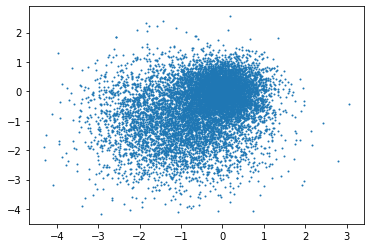

In [3]:
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

In [11]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=10)

True

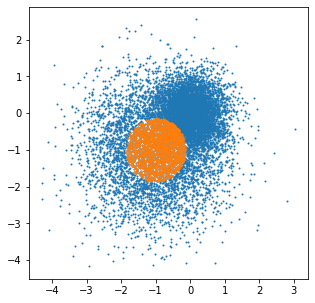

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);

# Benchmark

## First with Scikit-Learn

In [48]:
from sklearn.neighbors import NearestNeighbors
query = np.array([-2., -2.])
q = np.array([query])
n = 10

In [49]:
nn = NearestNeighbors(n_neighbors=n, algorithm='ball_tree').fit(vecs)

In [50]:
%%timeit 
distances, indices = nn.kneighbors(q)

270 µs ± 8.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
nn = NearestNeighbors(n_neighbors=n, algorithm='kd_tree').fit(vecs)

In [52]:
%%timeit 
distances, indices = nn.kneighbors(q)

276 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
nn = NearestNeighbors(n_neighbors=n, algorithm='brute').fit(vecs)

In [54]:
%%timeit 
distances, indices = nn.kneighbors(q)

496 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Now with Annoy

In [46]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=10)

True

In [47]:
%%timeit 
annoy.get_nns_by_vector(query, n)

11.2 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

True

In [44]:
%%timeit 
annoy.get_nns_by_vector(query, n)

3.17 µs ± 77.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Disk and Metrics

In [55]:
columns = 2
vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)), 
    np.random.normal(0, 0.5, (5000, columns)),
])

metric = 'euclidean'

annoy = AnnoyIndex(columns, metric)
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

True

In [ ]:
annoy.save('test.ann')
annoy_from_disk = AnnoyIndex(columns, metric)
annoy_from_disk.load('test.ann')